# Modelling Using Decision Trees

In this notebook we will figure how decision trees work on classifying our data in terms of two target variables
1. Delayed (yes or no)
2. Budget overrun (yes or no)

In [14]:
#import libraries
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.svm import SVC


In [15]:
import pandas as pd

In [16]:
#reading file into dataframe
df = pd.read_csv('Prepared_Data.csv')

In [17]:
# defining target var for the first model
y = df["Delayed"]
y.head()

0    0
1    1
2    1
3    0
4    0
Name: Delayed, dtype: int64

In [18]:
#determining predictor vars for the first model
X = df.drop(['Delayed','PROJECT_ID','Times_Delayed','Amount_of_Delay_(Quarters)','Initial_completion_date', 'final_completion_date','REGION','MUNICIPALITY'], axis=1)

In [20]:
from sklearn.model_selection import train_test_split

In [28]:
#splitting data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

After defining our data now we will instantiate fit and score our model. We will try to vary the hyperparameter -max_depth to understand how the accuracy varies

with depth  1  The classification accuracy is: 64.138
with depth  2  The classification accuracy is: 66.897
with depth  3  The classification accuracy is: 66.207
with depth  4  The classification accuracy is: 64.138
with depth  5  The classification accuracy is: 64.138
with depth  6  The classification accuracy is: 64.138
with depth  7  The classification accuracy is: 66.897
with depth  8  The classification accuracy is: 64.138
with depth  9  The classification accuracy is: 64.828
with depth  10  The classification accuracy is: 64.828


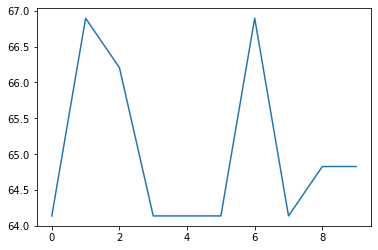

In [27]:
#creating a loop to iterate through different depths for the decision tree

accuracy = []
for i in range(1,11):
    #Getting the score
    DT_model_one = tree.DecisionTreeClassifier(max_depth=i)
    DT_model_one = DT_model_one.fit(X_train,y_train)
    print("with depth ",i," The classification accuracy is: %3.3f" % (100 * DT_model_one.score(X_test,y_test)))
    accuracy.append(100 * DT_model_one.score(X_test,y_test))
#plotting the graph
plt.plot(accuracy)

[Text(196.0342105263158, 199.32, 'X[35] <= 2.0\nentropy = 0.498\nsamples = 963\nvalue = [452, 511]'),
 Text(118.9421052631579, 163.07999999999998, 'X[3] <= 36.5\nentropy = 0.426\nsamples = 344\nvalue = [238, 106]'),
 Text(70.48421052631579, 126.83999999999999, 'X[35] <= 1.0\nentropy = 0.407\nsamples = 323\nvalue = [231, 92]'),
 Text(35.242105263157896, 90.6, 'X[35] <= 0.25\nentropy = 0.35\nsamples = 221\nvalue = [171, 50]'),
 Text(17.621052631578948, 54.359999999999985, 'X[0] <= 87.0\nentropy = 0.419\nsamples = 134\nvalue = [94, 40]'),
 Text(8.810526315789474, 18.119999999999976, 'entropy = 0.487\nsamples = 81\nvalue = [47, 34]'),
 Text(26.431578947368422, 18.119999999999976, 'entropy = 0.201\nsamples = 53\nvalue = [47, 6]'),
 Text(52.863157894736844, 54.359999999999985, 'X[13] <= 0.5\nentropy = 0.203\nsamples = 87\nvalue = [77, 10]'),
 Text(44.05263157894737, 18.119999999999976, 'entropy = 0.172\nsamples = 84\nvalue = [76, 8]'),
 Text(61.67368421052632, 18.119999999999976, 'entropy = 

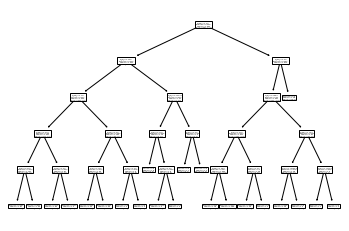

In [13]:
#Plotting the decision tree
tree.plot_tree(DT_model_one())

Using Decision Tree we get a highest of 66.8% accuracy on our test data at max_depth = 2. This is a lot better as compared to our previous model

In the next step we will repeat these steps for our other target variable - Budget overrun (yes or no)

In [29]:
y = df["Budget_Overrun"]
y.head()

0    0
1    1
2    1
3    0
4    0
Name: Budget_Overrun, dtype: int64

with depth  1  The classification accuracy is: 64.138
with depth  2  The classification accuracy is: 66.897
with depth  3  The classification accuracy is: 66.207
with depth  4  The classification accuracy is: 64.828
with depth  5  The classification accuracy is: 64.828
with depth  6  The classification accuracy is: 64.138
with depth  7  The classification accuracy is: 67.586
with depth  8  The classification accuracy is: 61.379
with depth  9  The classification accuracy is: 64.138
with depth  10  The classification accuracy is: 64.138


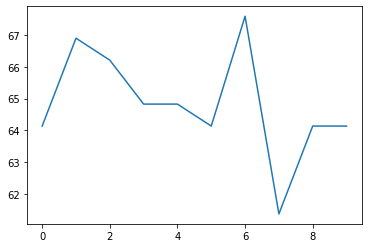

In [33]:
#creating a loop to iterate through different depths for the decision tree

accuracy = []
for i in range(1,11):
    
    #Getting the score
    DT_model_two = tree.DecisionTreeClassifier(max_depth=i)
    DT_model_two = DT_model_two.fit(X_train,y_train)
    print("with depth ",i," The classification accuracy is: %3.3f" % (100 * DT_model_two.score(X_test,y_test)))
    accuracy.append(100 *  DT_model_two.score(X_test,y_test))
#plotting the graph
plt.plot(accuracy)

The maximum accuracy we get is using DT model to predict the likelihood of budget overrun is 67% at the max_depth of 7

### Clustering Data Using Kmeans

In the below section we will create unsupervised clusters using Kmeans algorithm and try to decipher further patterns

In [35]:
#importing library
from sklearn.decomposition import PCA

In [36]:
# scaling X
# 1. Instantiate
my_scaler = StandardScaler()
# 2. Fit 
my_scaler.fit(X)
# 3. Transform
X_scaled = my_scaler.transform(X)

In [39]:
#instantiating and fitting PCA
my_pca_scaled = PCA().fit(X_scaled)

In [40]:
#transforming the data
X_PCA = my_pca_scaled.transform(X_scaled)

([<matplotlib.axis.XTick at 0x2ab8a684e80>,
 <a list of 40 Text xticklabel objects>)

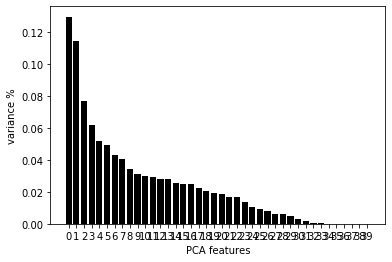

In [41]:
# Plot the explained variances
features = range(my_pca_scaled.n_components_)
plt.bar(features, my_pca_scaled.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [42]:
#creating a DF for Principle components
PCA_components = pd.DataFrame(X_PCA)

In [43]:
#importing Kmeans library
from sklearn.cluster import KMeans

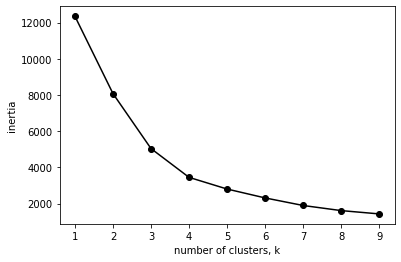

In [44]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    modelk = KMeans(n_clusters=k)
    
    # Fit model to samples
    modelk.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(modelk.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

As We can see 4 is the elbow point in this after which reduction in inertia reduction is not that substantial

In [45]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(PCA_components)
y_kmeans = kmeans.predict(PCA_components)

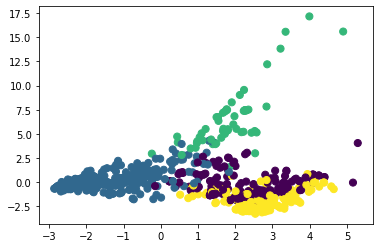

In [47]:
plt.scatter(PCA_components[0], PCA_components[1],s=50, c=y_kmeans, cmap='viridis')

In [48]:
#Adding back clusters to original df
X["cluster"] = y_kmeans

In [51]:
import numpy as np

In [54]:
table = pd.pivot_table(X, values='Budget_Overrun', index=['cluster'],aggfunc=np.mean)

In [55]:
table

,Budget_Overrun
cluster,
0,0.161458
1,0.066298
2,0.086207
3,0.276471
